# Faiss KNN imputation example and scikit-learn comparison

[Faiss](https://github.com/facebookresearch/faiss) is a library for efficient similarity search and clustering of dense vectors.
The FaissImputer makes use of faiss to efficiently search nearest neighbors for dense matrices.

## Prediction performance comparison

In [ ]:
import numpy as np
import pandas as pd
from fknni import FastKNNImputer
from sklearn.impute import KNNImputer

In [2]:
rng = np.random.default_rng(0)

df = pd.DataFrame(rng.integers(0, 10000, size=(10000, 50)), columns=[f"Col{i}" for i in range(1, 51)])
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col41,Col42,Col43,Col44,Col45,Col46,Col47,Col48,Col49,Col50
0,8506,6369,5111,2697,3078,409,752,165,1752,8132,...,4032,283,53,1242,82,6706,5256,6471,2572,6153
1,7640,3836,4609,9972,8049,9808,3795,6855,9501,6504,...,3281,8902,2639,2271,7141,6231,485,840,3771,8326
2,4008,7870,3164,2393,7916,8764,792,585,6712,3361,...,5100,6291,7639,9271,4098,4403,4742,9545,1957,4998
3,498,4252,9453,6202,3496,9950,6037,9489,163,4600,...,8273,9572,3603,1487,5168,9726,3672,8899,3838,8223
4,2295,4799,3268,2323,8926,8018,1396,9235,9709,2661,...,6501,3443,2262,4302,8732,9660,1410,5622,7614,2588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7523,6551,8097,6081,8655,363,3260,228,4241,7019,...,9844,8532,2359,149,1460,9669,1191,9544,3907,2662
9996,9746,4468,1166,5952,2395,619,6875,2307,7276,9250,...,564,9477,343,7070,1782,1315,535,7974,9487,2713
9997,2401,294,7631,6488,9356,7959,1750,5790,3663,5259,...,5370,4490,1151,1030,4393,9343,7796,4837,7515,97
9998,66,1199,3217,454,59,4133,1628,6929,3891,1335,...,6413,3992,5089,1601,4336,9602,6083,757,9119,3552


In [3]:
df_missing = df.copy()
indices = [(i, j) for i in range(df.shape[0]) for j in range(df.shape[1])]
rng.shuffle(indices)
for i, j in indices[:1000]:
    df_missing.iat[i, j] = np.nan
df_missing

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col41,Col42,Col43,Col44,Col45,Col46,Col47,Col48,Col49,Col50
0,8506.0,6369.0,5111.0,2697.0,3078.0,409.0,752.0,165.0,1752.0,8132.0,...,4032.0,283.0,53.0,1242.0,82.0,6706.0,5256.0,6471.0,2572.0,6153.0
1,7640.0,3836.0,4609.0,9972.0,8049.0,9808.0,3795.0,6855.0,9501.0,6504.0,...,3281.0,8902.0,2639.0,2271.0,7141.0,6231.0,485.0,840.0,3771.0,8326.0
2,4008.0,7870.0,3164.0,2393.0,7916.0,8764.0,792.0,585.0,6712.0,3361.0,...,5100.0,6291.0,7639.0,9271.0,4098.0,4403.0,4742.0,9545.0,1957.0,4998.0
3,498.0,4252.0,9453.0,6202.0,3496.0,9950.0,6037.0,9489.0,163.0,4600.0,...,8273.0,9572.0,3603.0,1487.0,5168.0,9726.0,3672.0,8899.0,3838.0,8223.0
4,2295.0,4799.0,3268.0,2323.0,8926.0,8018.0,1396.0,9235.0,9709.0,2661.0,...,6501.0,3443.0,2262.0,4302.0,8732.0,9660.0,1410.0,5622.0,7614.0,2588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7523.0,6551.0,8097.0,6081.0,8655.0,363.0,3260.0,NaN,4241.0,7019.0,...,9844.0,8532.0,2359.0,149.0,1460.0,9669.0,1191.0,9544.0,3907.0,2662.0
9996,9746.0,4468.0,1166.0,5952.0,2395.0,619.0,6875.0,2307.0,7276.0,9250.0,...,564.0,9477.0,343.0,7070.0,1782.0,1315.0,535.0,7974.0,9487.0,2713.0
9997,2401.0,294.0,7631.0,6488.0,9356.0,7959.0,1750.0,5790.0,3663.0,5259.0,...,5370.0,4490.0,1151.0,1030.0,4393.0,9343.0,7796.0,4837.0,7515.0,97.0
9998,66.0,1199.0,3217.0,454.0,59.0,4133.0,1628.0,6929.0,3891.0,1335.0,...,6413.0,3992.0,5089.0,1601.0,4336.0,9602.0,6083.0,757.0,9119.0,3552.0


In [ ]:
faiss_imputer = FastKNNImputer(n_neighbors=5, strategy="weighted")

df_imputed_faiss = faiss_imputer.fit_transform(df_missing)
df_imputed_faiss

array([[8506., 6369., 5111., ..., 6471., 2572., 6153.],
       [7640., 3836., 4609., ...,  840., 3771., 8326.],
       [4008., 7870., 3164., ..., 9545., 1957., 4998.],
       ...,
       [2401.,  294., 7631., ..., 4837., 7515.,   97.],
       [  66., 1199., 3217., ...,  757., 9119., 3552.],
       [6087., 2550., 8797., ..., 5440., 3217., 7215.]])

In [5]:
imputer = KNNImputer(n_neighbors=5)

In [6]:
df_imputed_scikit = imputer.fit_transform(df_missing)
df_imputed_scikit

array([[8506., 6369., 5111., ..., 6471., 2572., 6153.],
       [7640., 3836., 4609., ...,  840., 3771., 8326.],
       [4008., 7870., 3164., ..., 9545., 1957., 4998.],
       ...,
       [2401.,  294., 7631., ..., 4837., 7515.,   97.],
       [  66., 1199., 3217., ...,  757., 9119., 3552.],
       [6087., 2550., 8797., ..., 5440., 3217., 7215.]])

In [7]:
mse = np.mean((df_imputed_scikit - df_imputed_faiss) ** 2)
mae = np.mean(np.abs(df_imputed_scikit - df_imputed_faiss))

print(f"Mean Absolute Error between scikit-learn and faiss: {mae}")

Mean Absolute Error between scikit-learn and faiss: 1.1303051000488278


In [8]:
mse = np.mean((df - df_imputed_faiss) ** 2)
mae = np.mean(np.abs(df - df_imputed_faiss))

print(f"Mean Absolute Error between original DataFrame and faiss: {mae}")

Mean Absolute Error between original DataFrame and faiss: 5.3263165349121095


In [9]:
mse = np.mean((df - df_imputed_scikit) ** 2)
mae = np.mean(np.abs(df - df_imputed_scikit))

print(f"Mean Absolute Error between original DataFrame and scikit-learn: {mae}")

Mean Absolute Error between original DataFrame and scikit-learn: 5.354942800000002


## Speed comparison

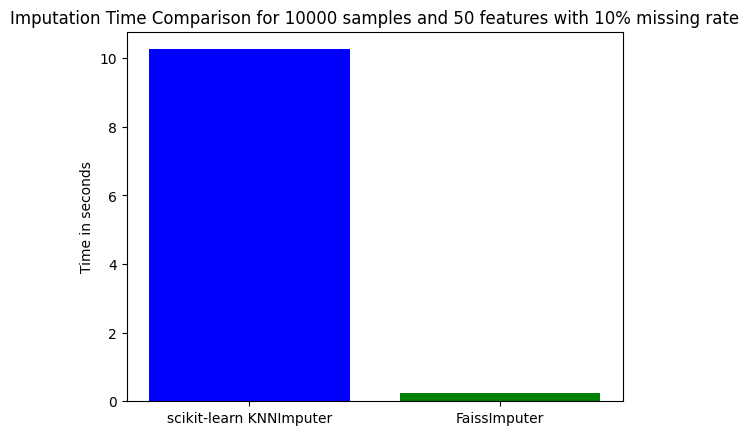

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

n_samples, n_features = 10000, 50
X, _ = make_classification(n_samples=n_samples, n_features=n_features, random_state=42)
X = pd.DataFrame(X)
n_missing = int(n_samples * n_features * 0.1)
missing_indices = np.random.choice(X.size, n_missing, replace=False)
X.values[np.unravel_index(missing_indices, X.shape)] = np.nan

knn_imputer = KNNImputer(n_neighbors=5)
faiss_imputer = FastKNNImputer(n_neighbors=5)

start_time = time.time()
knn_imputed = knn_imputer.fit_transform(X)
knn_time = time.time() - start_time

start_time = time.time()
faiss_imputed = faiss_imputer.fit_transform(X)
faiss_time = time.time() - start_time

times = [knn_time, faiss_time]
labels = ["scikit-learn KNNImputer", "FastKNNImputer"]
plt.bar(labels, times, color=["blue", "green"])
plt.ylabel("Time in seconds")
plt.title("Imputation Time Comparison for 10000 samples and 50 features with 10% missing rate")
plt.show()